In [1]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# Load the feature engineered dataset
data = pd.read_csv("feature_engineered.csv")


In [3]:

# General Overview
print("Dataset Shape:", data.shape) #rows 1000 only
print("\nData Types:\n", data.dtypes)
print("\nMissing Values:\n", data.isnull().sum())
print("\nBasic Statistics:\n", data.describe(include='all'))


Dataset Shape: (1000, 14)

Data Types:
 patientunitstayid              int64
age                          float64
ethnicity                      int64
hospitaladmitsource            int64
hospitaldischargelocation      int64
hospitaldischargestatus        int64
labresult                    float64
diagnosisstring               object
icd9code                       int64
treatmentstring                int64
age_group                      int64
admitdxtext_length             int64
is_female                      int64
critical_discharge             int64
dtype: object

Missing Values:
 patientunitstayid            0
age                          0
ethnicity                    0
hospitaladmitsource          0
hospitaldischargelocation    0
hospitaldischargestatus      0
labresult                    0
diagnosisstring              0
icd9code                     0
treatmentstring              0
age_group                    0
admitdxtext_length           0
is_female                    0
critica

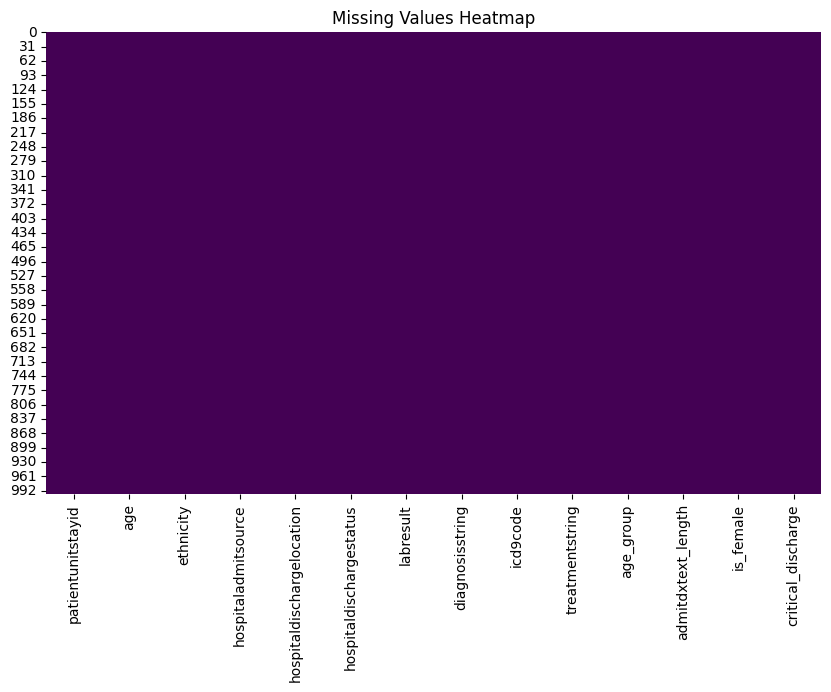

In [4]:

# Missing Value Visualization
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


no missing values


Class Proportions:
 critical_discharge
0    0.783
1    0.217
Name: proportion, dtype: float64


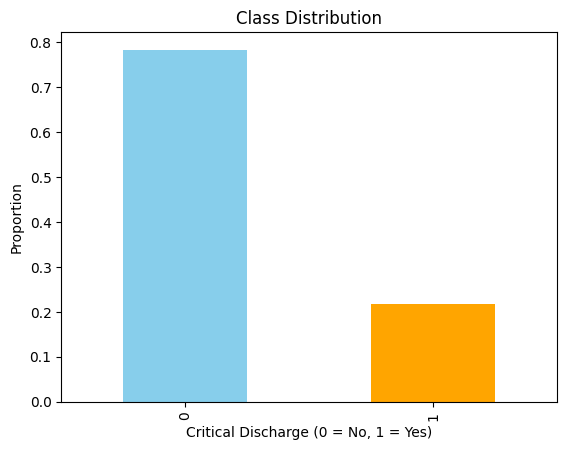

In [5]:

# Class Balance
class_counts = data['critical_discharge'].value_counts(normalize=True)
print("\nClass Proportions:\n", class_counts)
class_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title("Class Distribution")
plt.xlabel("Critical Discharge (0 = No, 1 = Yes)")
plt.ylabel("Proportion")
plt.show()


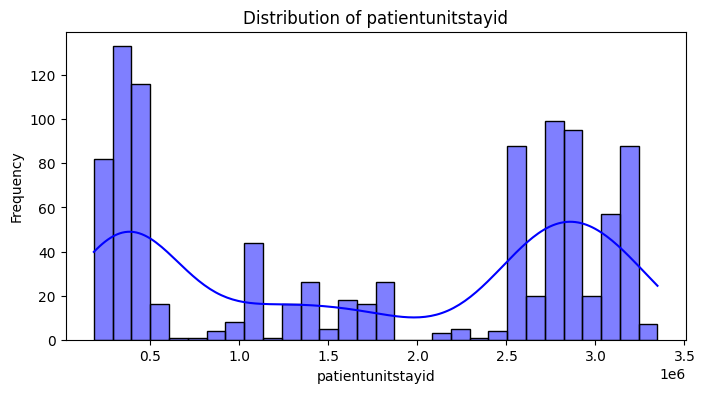

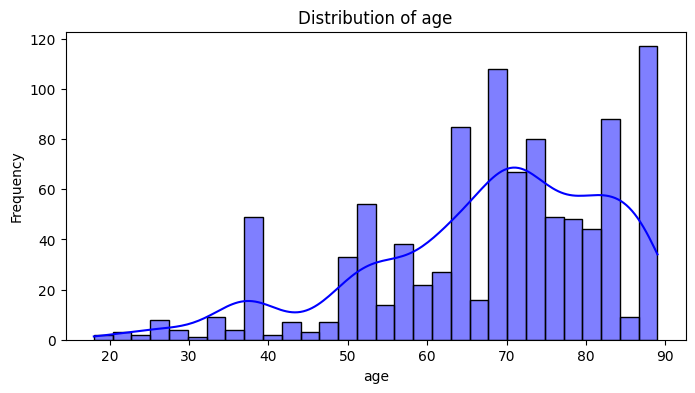

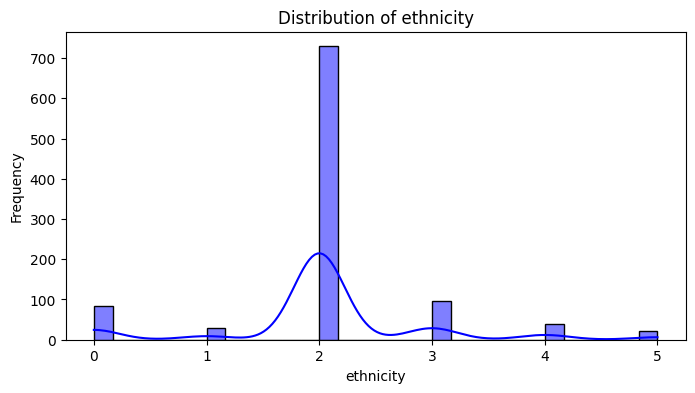

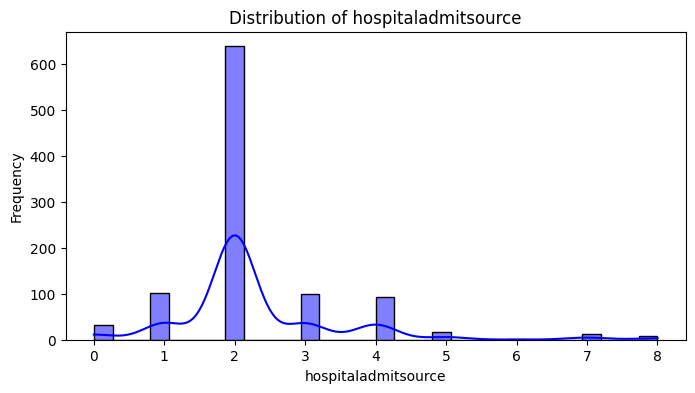

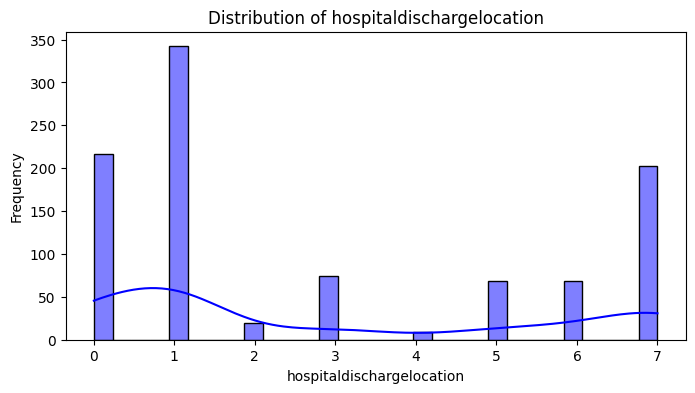

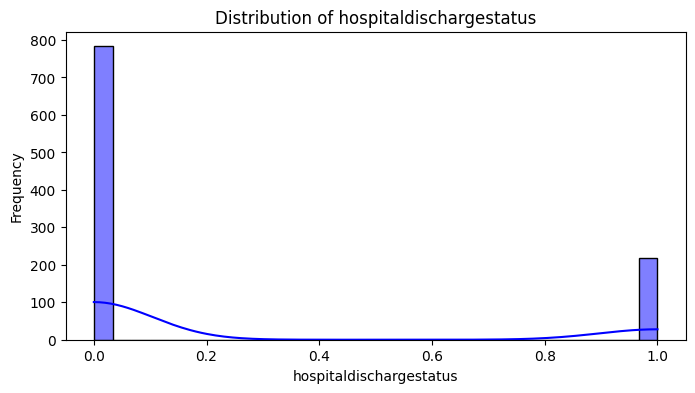

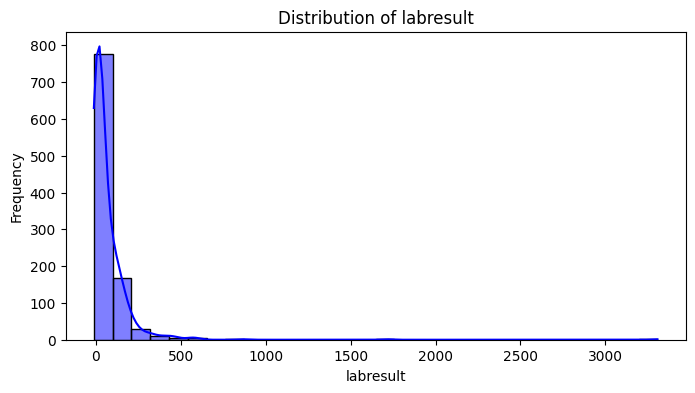

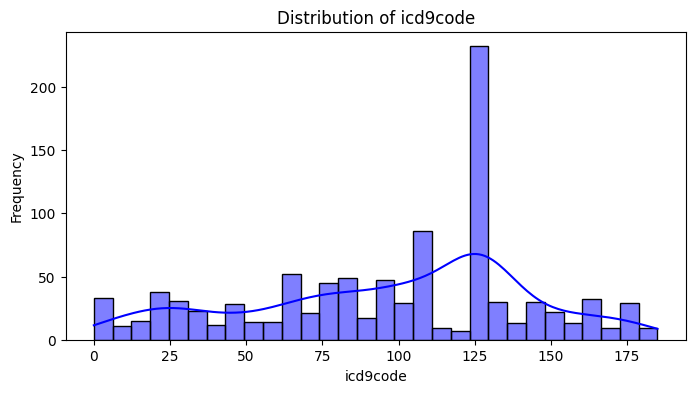

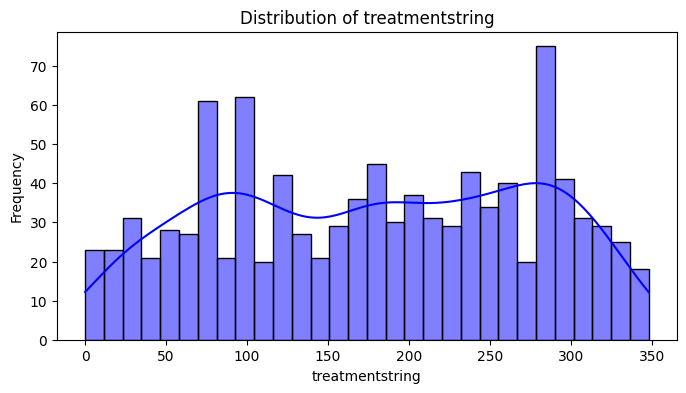

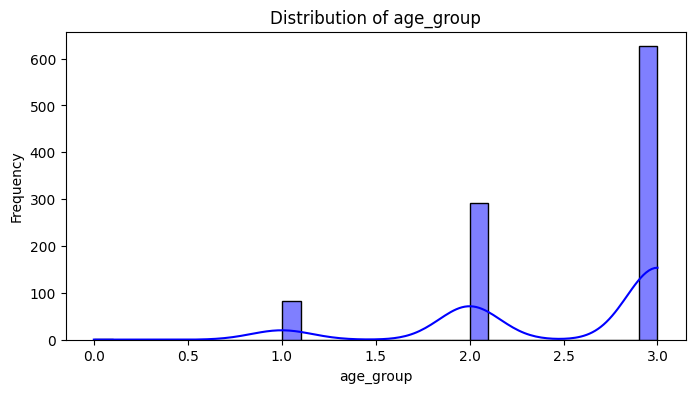

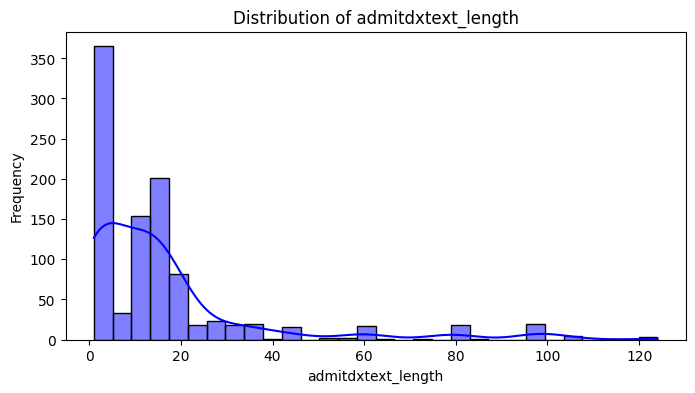

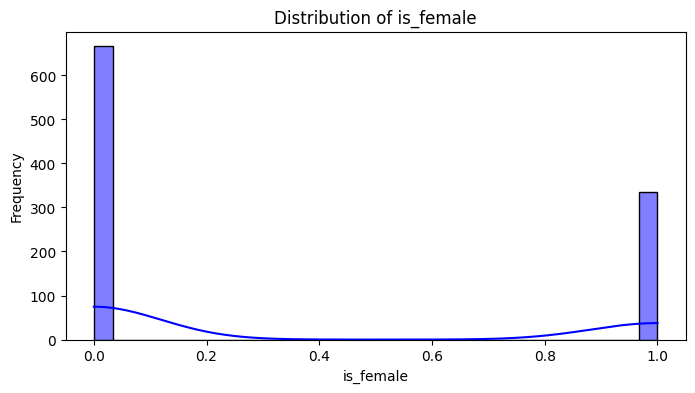

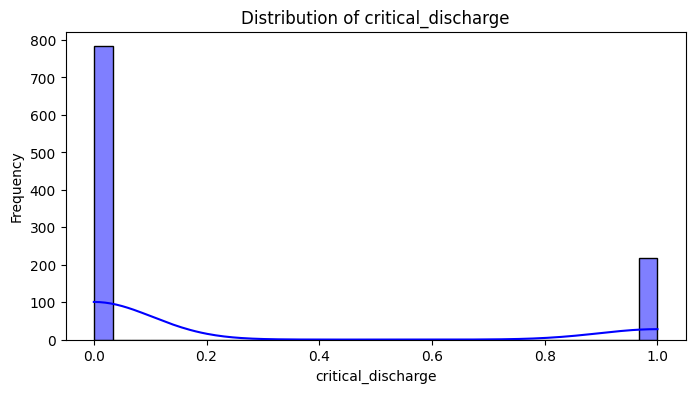

In [6]:

# Numerical Features Analysis
numerical_features = data.select_dtypes(include=['float64', 'int32', 'int64']).columns

for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[feature], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()


C:\Users\Natasha\AppData\Local\Temp\ipykernel_19936\3682865306.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


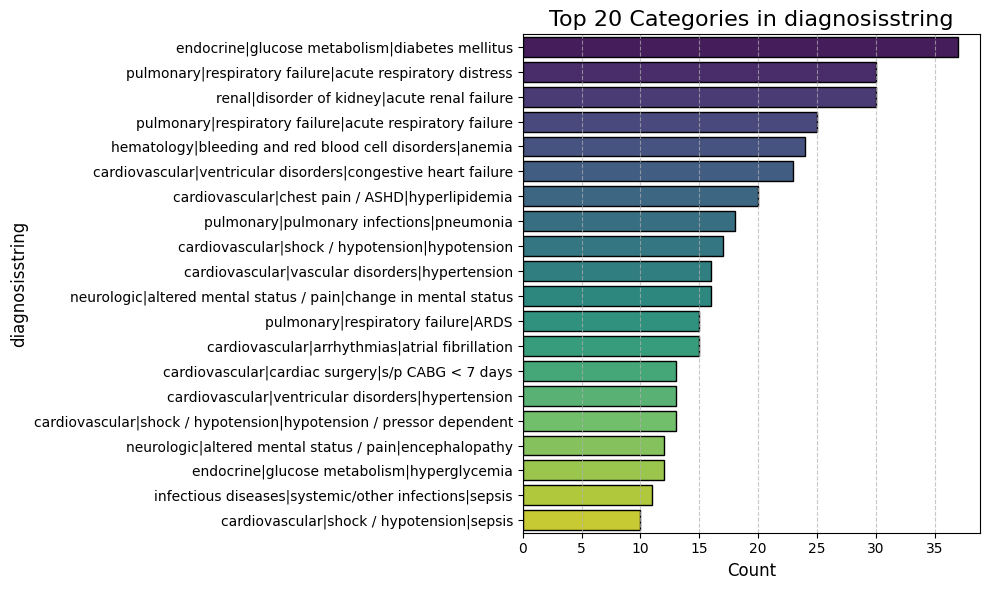

In [5]:
# Categorical Features Analysis
categorical_features = data.select_dtypes(include=['object', 'category']).columns

for feature in categorical_features:
    # Count the occurrences of each category
    category_counts = data[feature].value_counts()
    
    # Limit to the top 20 categories for better visualization
    top_categories = category_counts.head(20)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=top_categories.values,
        y=top_categories.index,
        palette="viridis",
        edgecolor="black"
    )
    plt.title(f"Top 20 Categories in {feature}", fontsize=16)
    plt.xlabel("Count", fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


C:\Users\Natasha\AppData\Local\Temp\ipykernel_25552\3949628750.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


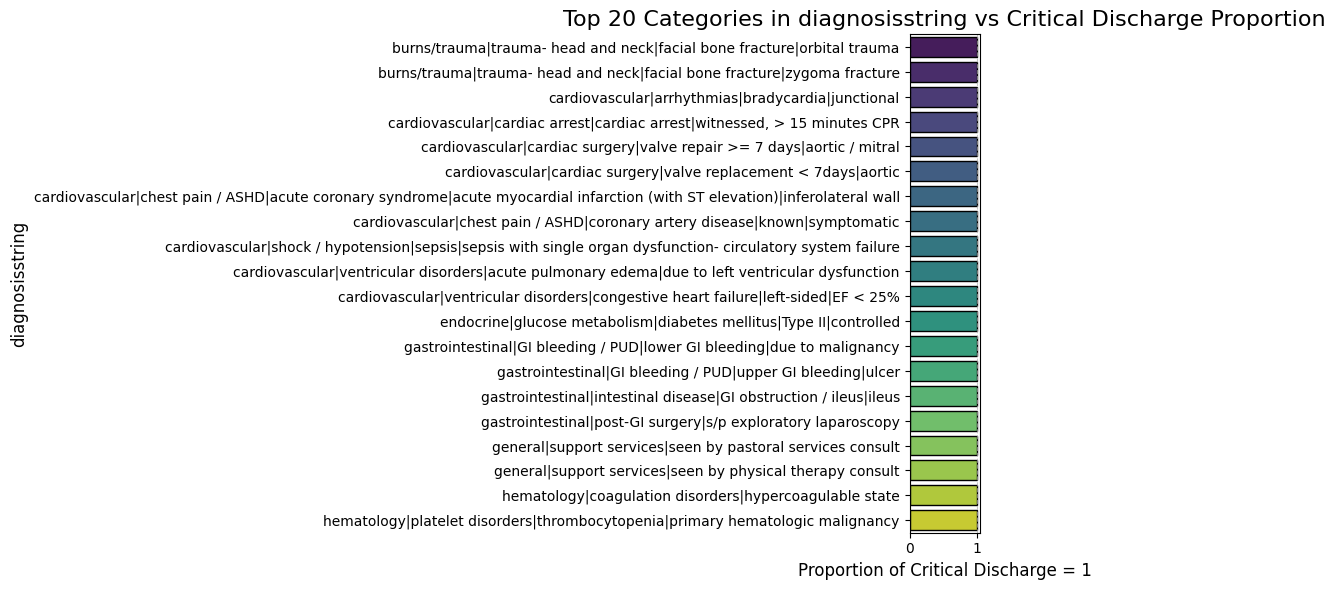

In [13]:
# Categorical Features Analysis
categorical_features = data.select_dtypes(include=['object', 'category']).columns

for feature in categorical_features:
    # Calculate the proportion of critical_discharge = 1 for each category
    category_proportions = data.groupby(feature)['critical_discharge'].mean()
    
    # Sort by the proportion and limit to the top 20 categories for better visualization
    top_categories = category_proportions.nlargest(20)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=top_categories.values,
        y=top_categories.index,
        palette="viridis",
        edgecolor="black"
    )
    plt.title(f"Top 20 Categories in {feature} vs Critical Discharge Proportion", fontsize=16)
    plt.xlabel("Proportion of Critical Discharge = 1", fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


A proportion of 1 indicates that all patients in that category had a critical discharge, while a proportion close to 0 means almost none did. The categories at the top of the chart (e.g., burns/trauma-related diagnoses) have the highest association with critical discharges. This suggests that patients in these categories are more likely to experience readmission. Diagnoses like cardiovascular arrest, acute coronary syndrome, and sepsis are strongly linked with critical discharges, which aligns with their severity and life-threatening nature.

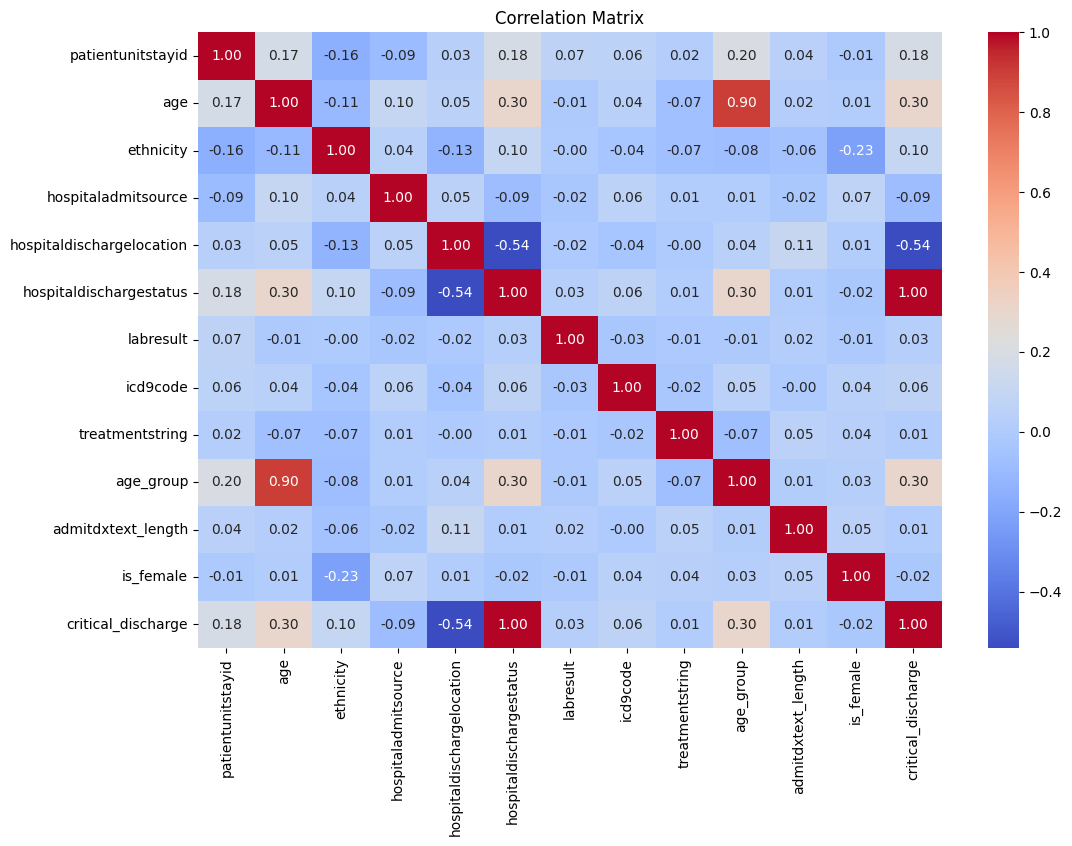

In [11]:
# Correlation Matrix with Numeric Columns
plt.figure(figsize=(12, 8))
numeric_data = data.select_dtypes(include=['float64', 'int64', 'float32', 'int32'])  # Only numeric columns
correlation = numeric_data.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()


C:\Users\Natasha\AppData\Local\Temp\ipykernel_25552\1771560286.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='critical_discharge', y='labresult', data=data, palette="Set2")


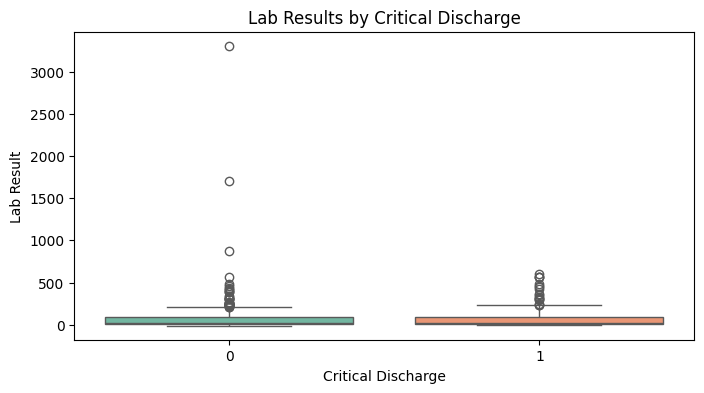

C:\Users\Natasha\AppData\Local\Temp\ipykernel_25552\1771560286.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='critical_discharge', y='age', data=data, palette="Set2")


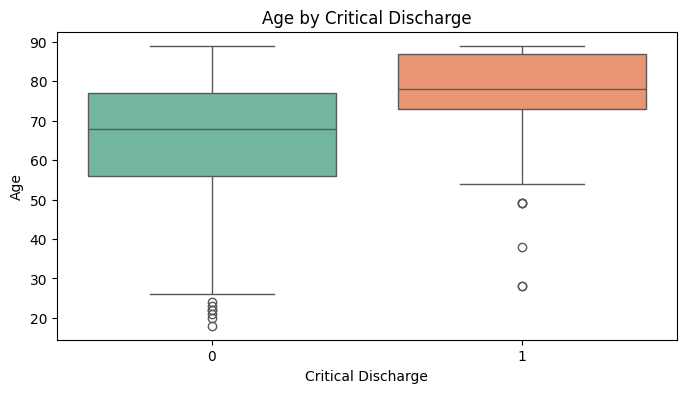

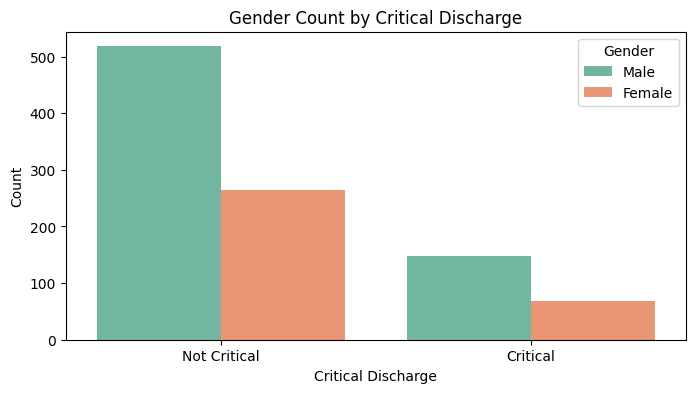

C:\Users\Natasha\AppData\Local\Temp\ipykernel_25552\1771560286.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='critical_discharge', y='admitdxtext_length', data=data, palette="Set2")


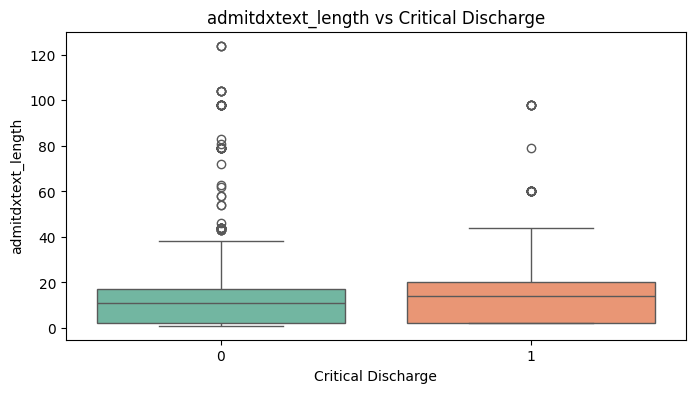

EDA completed successfully!


In [ ]:

# Relationships Between Key Features
#Lab results vs. critical discharge
plt.figure(figsize=(8, 4))
sns.boxplot(x='critical_discharge', y='labresult', data=data, palette="Set2")
plt.title("Lab Results by Critical Discharge")
plt.xlabel("Critical Discharge")
plt.ylabel("Lab Result")
plt.show()

#Age vs. critical discharge
plt.figure(figsize=(8, 4))
sns.boxplot(x='critical_discharge', y='age', data=data, palette="Set2")
plt.title("Age by Critical Discharge")
plt.xlabel("Critical Discharge")
plt.ylabel("Age")
plt.show()


#Gender vs critical discharge
plt.figure(figsize=(8, 4))
sns.countplot(x='critical_discharge', hue='is_female', data=data, palette="Set2")
plt.title("Gender Count by Critical Discharge")
plt.xlabel("Critical Discharge")
plt.ylabel("Count")
plt.xticks([0, 1], ["Not Critical", "Critical"])
plt.legend(["Male", "Female"], title="Gender")
plt.show()



print("EDA completed successfully!")


Lab Results vs Critical discharge
This visualization suggests that the overall distribution for both groups are quite similar, indicating no drastic differences between the lab results of critical and non-critical discharges.
Lab results alone may not strongly differentiate between critical and non-critical discharges since the distributions overlap considerably.
Outliers could represent specific conditions or errors in lab data 


Age vs Critical discharge
Patients who are older often have more chronic conditions, frailty, or complications, which can increase the likelihood of readmission after discharge, especially if discharged in a critical condition.
The boxplot shows that critical discharge is strongly associated with older patients, suggesting age may be an indirect predictor of readmission risk. Since older patients dominate the critical discharge group, it reinforces the notion that older, critically discharged individuals are key targets for readmission prediction models.

Gender vs Critical Discharge
It does not say much. Just shows there are more men in this subset of this dataset and that is corresponds to the class imbalance in critical_discharge. It can also be said that men receive more treatment from the hospitals.

Admittextlength vs critical discharge
Both groups have a similar median length of admitting diagnosis descriptions, suggesting that on average, the level of detail in the admitting diagnosis does not differ significantly between critically discharged and non-critically discharged patients.



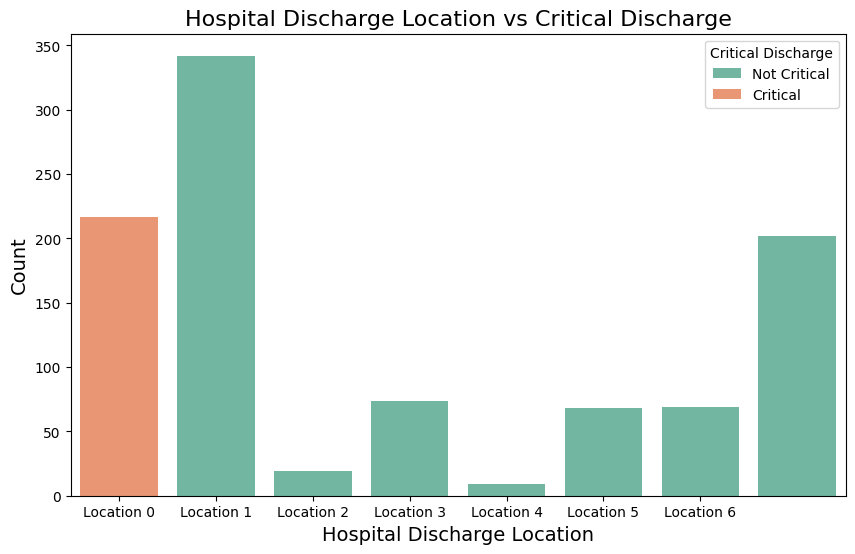

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouped Bar Plot: Hospital Discharge Location vs Critical Discharge
plt.figure(figsize=(10, 6))
sns.countplot(
    data=data,
    x='hospitaldischargelocation',
    hue='critical_discharge',
    palette='Set2'
)
plt.title('Hospital Discharge Location vs Critical Discharge', fontsize=16)
plt.xlabel('Hospital Discharge Location', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Critical Discharge', labels=['Not Critical', 'Critical'])
plt.xticks(ticks=range(7), labels=[f'Location {i}' for i in range(0, 7)])
plt.show()


0:Death
1:Home
2:Nursing Home
3:Other
4:Other External
5:Other hospital
6:Rehabilitation
7:Skilled nursing facility

Patients discharged to facilities like nursing homes, skilled nursing, or other hospitals often show higher readmission rates.

In [13]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   patientunitstayid          1000 non-null   int64  
 1   age                        1000 non-null   float64
 2   ethnicity                  1000 non-null   int64  
 3   hospitaladmitsource        1000 non-null   int64  
 4   hospitaldischargelocation  1000 non-null   int64  
 5   hospitaldischargestatus    1000 non-null   int64  
 6   labresult                  1000 non-null   float64
 7   diagnosisstring            1000 non-null   object 
 8   icd9code                   1000 non-null   int64  
 9   treatmentstring            1000 non-null   int64  
 10  age_group                  1000 non-null   int64  
 11  admitdxtext_length         1000 non-null   int64  
 12  is_female                  1000 non-null   int64  
 13  critical_discharge         1000 non-null   int64 

Outlier Handling

In [17]:
import numpy as np 
#  Identify and handle outliers using IQR
numeric_cols = ['age', 'labresult', 'admitdxtext_length']
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with the median
    median = data[col].median()
    data[col] = np.where((data[col] < lower_bound) | (data[col] > upper_bound), median, data[col])


In [19]:
# Confirm categorical columns are encoded as integers
categorical_cols = ['ethnicity', 'hospitaladmitsource', 'hospitaldischargelocation', 
                    'hospitaldischargestatus', 'icd9code', 'treatmentstring']
for col in categorical_cols:
    if data[col].dtype != 'int':
        raise ValueError(f"{col} is not properly encoded. Please check.")


ValueError: ethnicity is not properly encoded. Please check.

In [20]:
print(data['ethnicity'].dtype)
print(data['ethnicity'].unique())


int64
[3 2 5 0 4 1]


In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['ethnicity'] = le.fit_transform(data['ethnicity'])
print(data['ethnicity'].dtype)  # Verify it is now integer
print(data['ethnicity'].unique())


int64
[3 2 5 0 4 1]


In [22]:
for col in categorical_cols:
    if data[col].dtype != 'int':
        raise ValueError(f"{col} is not properly encoded. Please check.")


ValueError: ethnicity is not properly encoded. Please check.

In [23]:
categorical_cols = ['ethnicity', 'hospitaladmitsource', 'hospitaldischargelocation', 
                    'hospitaldischargestatus', 'icd9code', 'treatmentstring']
print(data.columns)
print(categorical_cols)


Index(['patientunitstayid', 'age', 'ethnicity', 'hospitaladmitsource',
       'hospitaldischargelocation', 'hospitaldischargestatus', 'labresult',
       'diagnosisstring', 'icd9code', 'treatmentstring', 'age_group',
       'admitdxtext_length', 'is_female', 'critical_discharge'],
      dtype='object')
['ethnicity', 'hospitaladmitsource', 'hospitaldischargelocation', 'hospitaldischargestatus', 'icd9code', 'treatmentstring']


In [24]:
print(data['ethnicity'].apply(type).unique())


[<class 'int'>]


In [25]:
data['ethnicity'] = pd.to_numeric(data['ethnicity'], errors='coerce').fillna(0).astype(int)


In [26]:
for col in categorical_cols:
    if col not in data.columns:
        print(f"Column {col} not found in DataFrame.")
    elif data[col].dtype != 'int':
        print(f"Column {col} is not integer. Data type: {data[col].dtype}")
    else:
        print(f"Column {col} passed validation.")


Column ethnicity passed validation.
Column hospitaladmitsource is not integer. Data type: int64
Column hospitaldischargelocation is not integer. Data type: int64
Column hospitaldischargestatus is not integer. Data type: int64
Column icd9code is not integer. Data type: int64
Column treatmentstring is not integer. Data type: int64


In [27]:
# Validate categorical columns
for col in categorical_cols:
    if not np.issubdtype(data[col].dtype, np.integer):
        raise ValueError(f"{col} is not properly encoded as an integer. Data type: {data[col].dtype}")
    else:
        print(f"Column {col} passed validation.")


Column ethnicity passed validation.
Column hospitaladmitsource passed validation.
Column hospitaldischargelocation passed validation.
Column hospitaldischargestatus passed validation.
Column icd9code passed validation.
Column treatmentstring passed validation.


In [28]:
for col in categorical_cols:
    print(f"Column: {col}, Data Type: {data[col].dtype}")


Column: ethnicity, Data Type: int32
Column: hospitaladmitsource, Data Type: int64
Column: hospitaldischargelocation, Data Type: int64
Column: hospitaldischargestatus, Data Type: int64
Column: icd9code, Data Type: int64
Column: treatmentstring, Data Type: int64


In [29]:
# Ensure all categorical columns have consistent integer type
for col in categorical_cols:
    data[col] = data[col].astype('int64')

# Re-run validation
for col in categorical_cols:
    if not np.issubdtype(data[col].dtype, np.integer):
        raise ValueError(f"{col} is not properly encoded as an integer. Data type: {data[col].dtype}")
    else:
        print(f"Column {col} passed validation.")


Column ethnicity passed validation.
Column hospitaladmitsource passed validation.
Column hospitaldischargelocation passed validation.
Column hospitaldischargestatus passed validation.
Column icd9code passed validation.
Column treatmentstring passed validation.


In [30]:
for col in categorical_cols:
    print(f"Column: {col}, Data Type: {data[col].dtype}")


Column: ethnicity, Data Type: int64
Column: hospitaladmitsource, Data Type: int64
Column: hospitaldischargelocation, Data Type: int64
Column: hospitaldischargestatus, Data Type: int64
Column: icd9code, Data Type: int64
Column: treatmentstring, Data Type: int64


In [31]:
data.to_csv("for_model.csv",index=False)

splitting model into training and testing data

In [33]:
from sklearn.model_selection import train_test_split

# Split features and target variable
X = data.drop(columns=['critical_discharge'])  # Features
y = data['critical_discharge']                # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Save train and test sets
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

train_data.to_csv("train_data.csv", index=False)
test_data.to_csv("test_data.csv", index=False)
